Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 samples:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Missing values in dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

Training set size: (120, 4)
Testing set size: (30, 4)


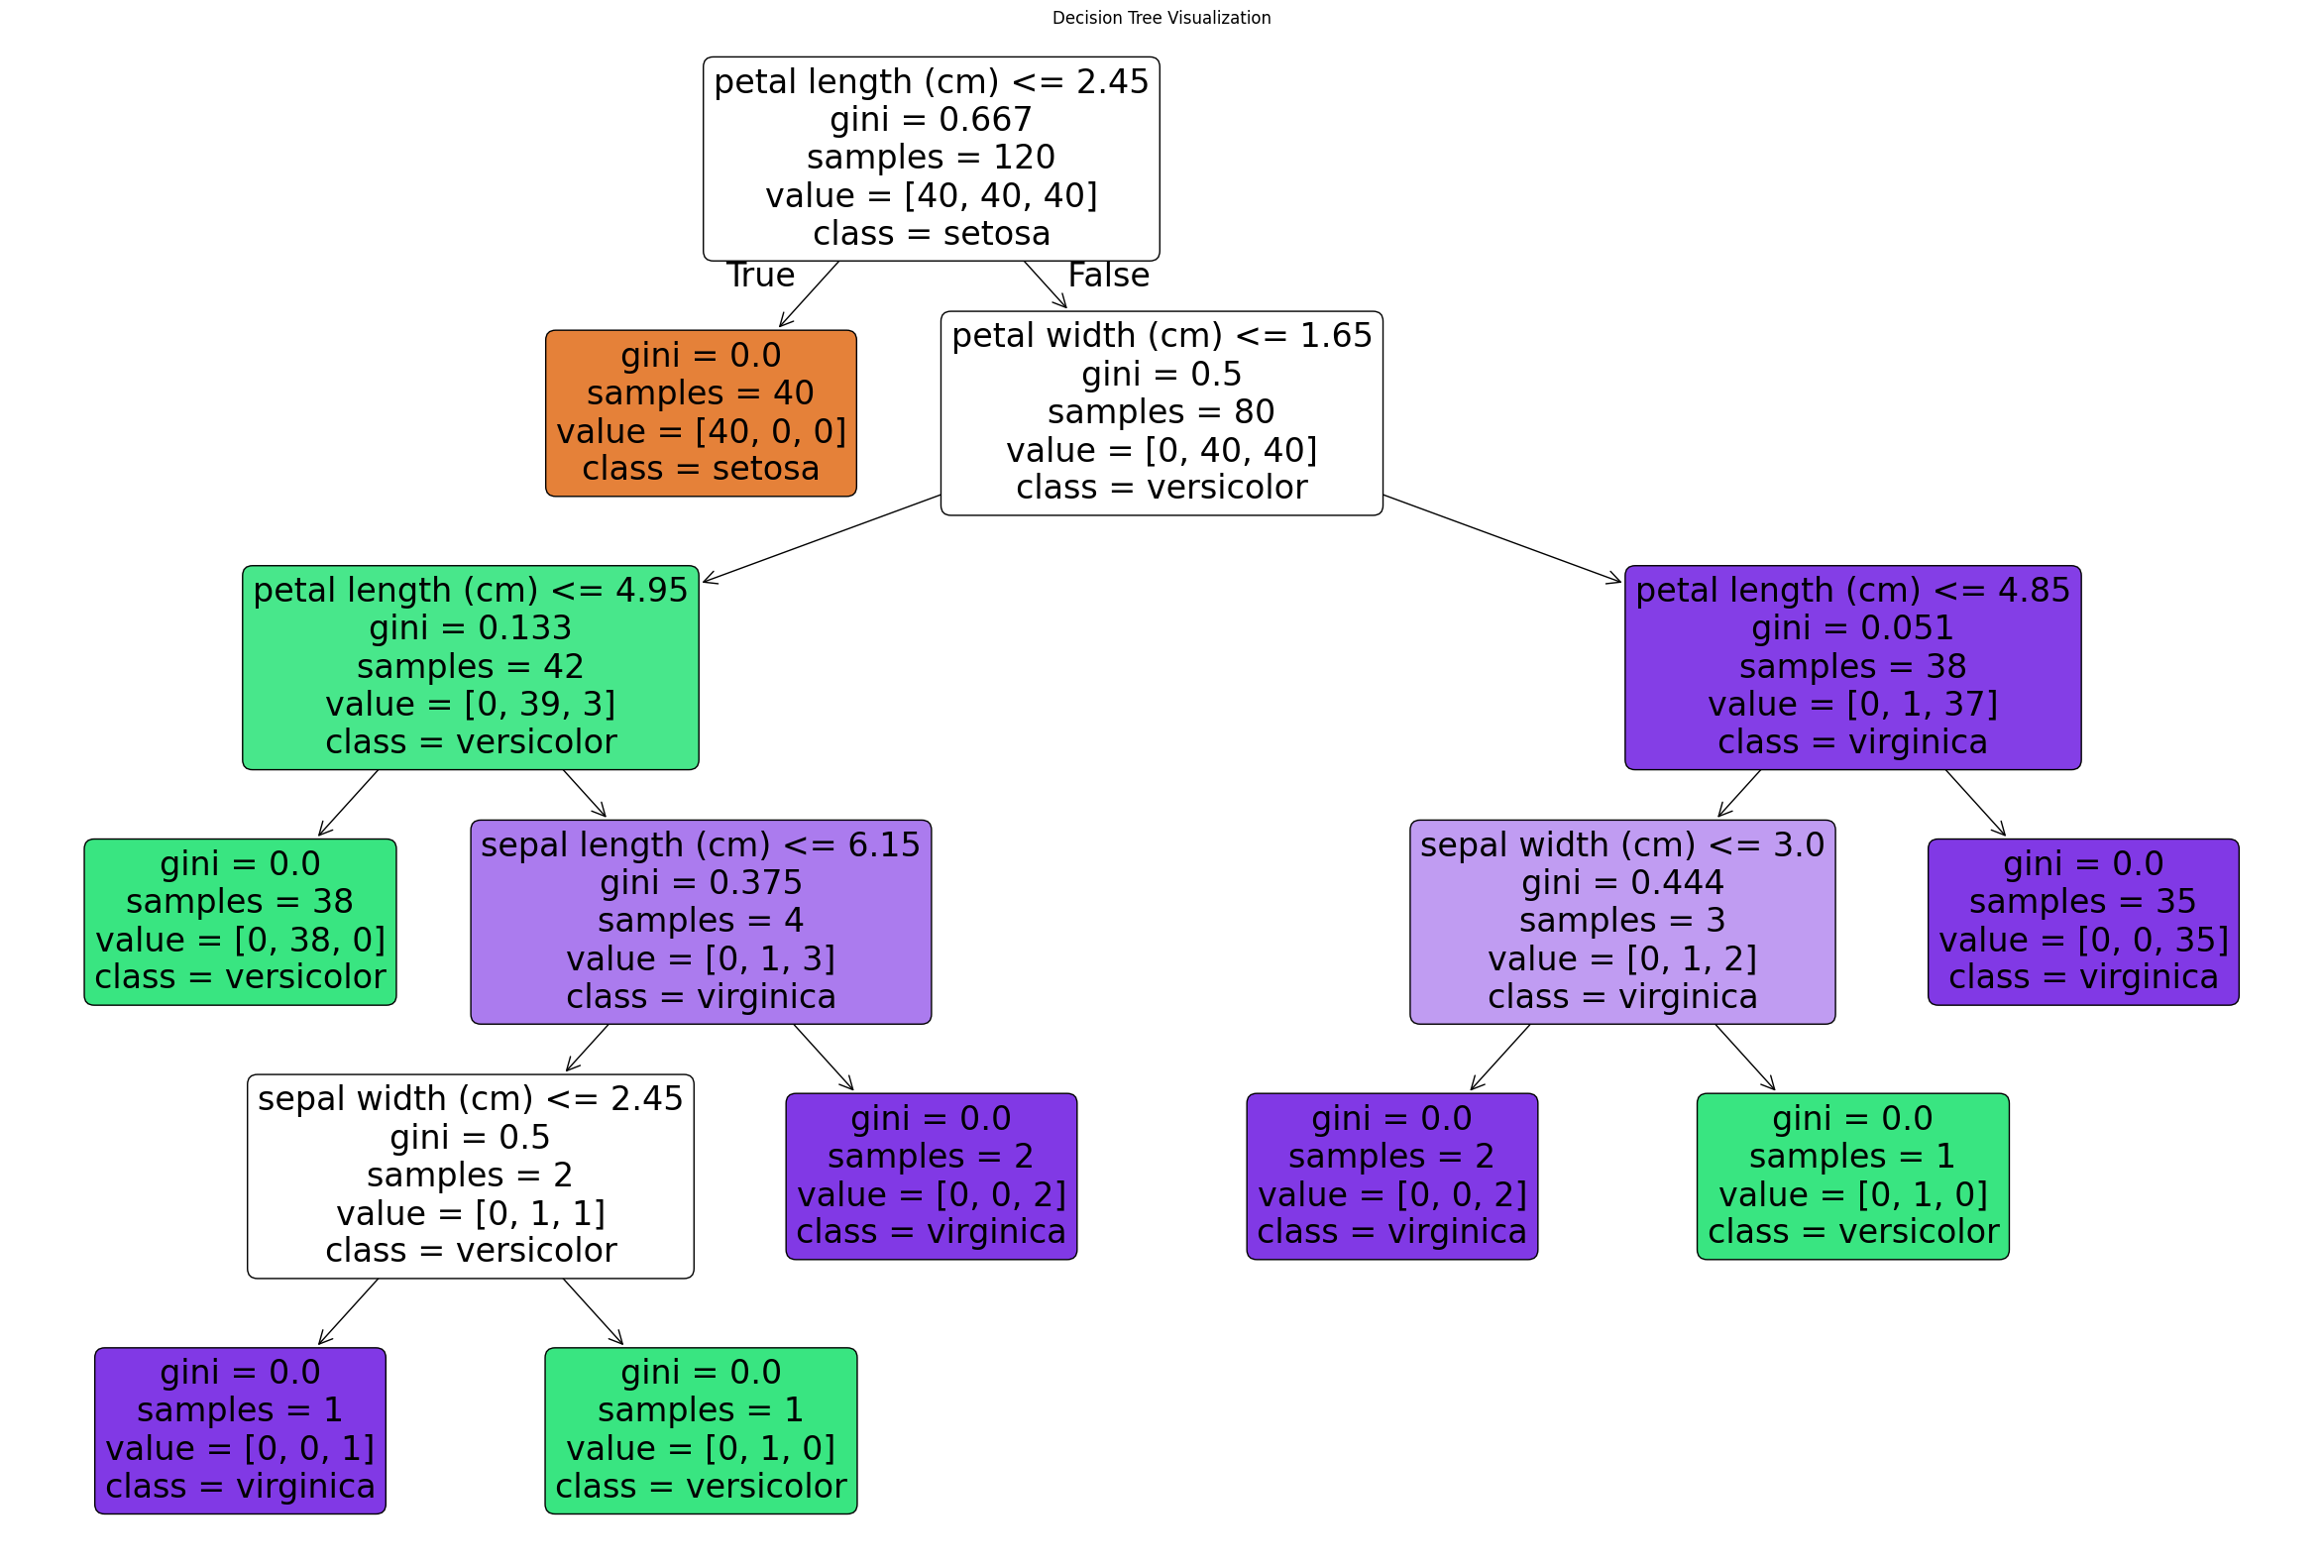

Model Evaluation Metrics:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



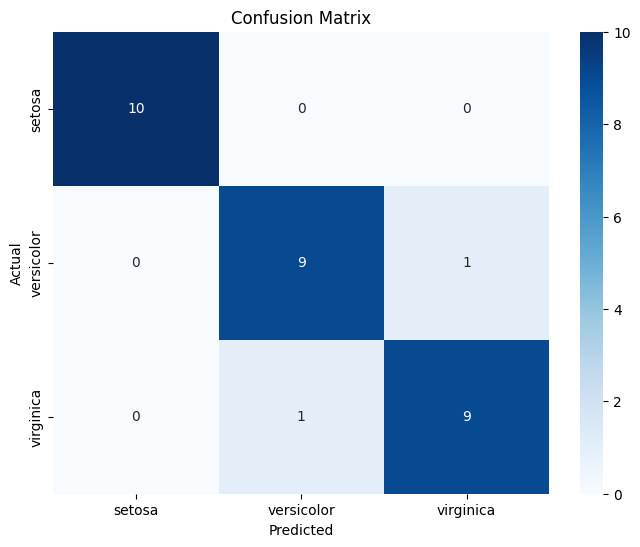

In [ ]:
# %% [markdown]
# ## Task 1: Classical ML with Scikit-learn - Iris Species Classification
#
# ### Objective:
# - Preprocess the Iris dataset
# - Train a decision tree classifier
# - Evaluate model performance

# %%
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                            precision_score,
                            recall_score,
                            classification_report,
                            confusion_matrix)

# %%
# Load and explore the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (species)
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = y
iris_df['species_name'] = iris_df['species'].map({i: name for i, name in enumerate(target_names)})

# Display dataset information
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 5 samples:")
display(iris_df.head())

# %%
# Data preprocessing
# Check for missing values
print("\nMissing values in dataset:")
print(iris_df.isnull().sum())

# No encoding needed as target is already numerical
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# %%
# Model training - Decision Tree Classifier
# Initialize the model with default parameters
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(30,20))
plot_tree(dt_classifier,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# %%
# Model evaluation
# Predict on test set
y_pred = dt_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


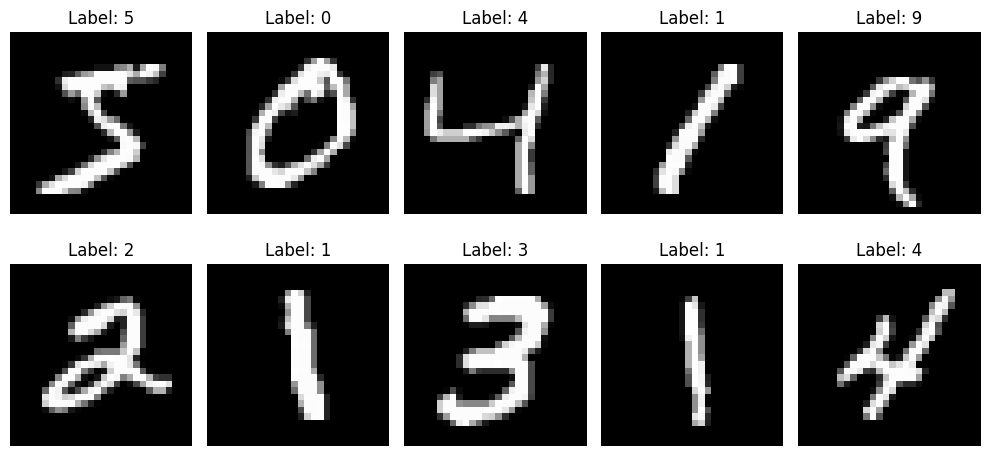

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.8330 - loss: 0.5498 - val_accuracy: 0.9800 - val_loss: 0.0742
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9775 - loss: 0.0694 - val_accuracy: 0.9822 - val_loss: 0.0584
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.9861 - loss: 0.0458 - val_accuracy: 0.9830 - val_loss: 0.0622
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9887 - loss: 0.0339 - val_accuracy: 0.9873 - val_loss: 0.0451
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9910 - loss: 0.0283 - val_accuracy: 0.9875 - val_loss: 0.0443
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9935 - loss: 0.0201 - val_accuracy: 0.9886 - val_loss: 0.0424
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.9890 - val_loss: 0.0402
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.9953 - loss: 0.0136 - 

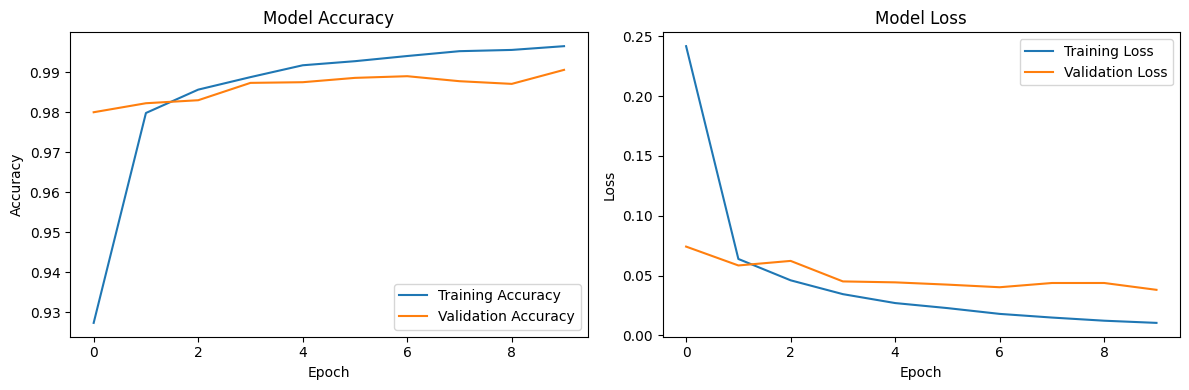

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


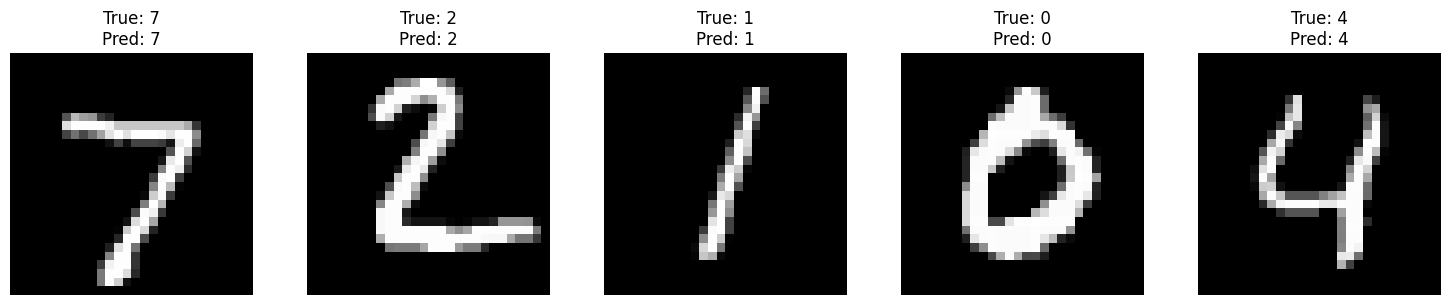

In [ ]:
# %% [markdown]
# ## Task 2: Deep Learning with TensorFlow - MNIST Digit Classification
#
# ### Objective:
# - Build a CNN model to classify handwritten digits
# - Achieve >95% test accuracy
# - Visualize predictions on sample images

# %%
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# %%
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to include channel dimension (for CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# %%
# Visualize sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# %%
# Build CNN model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

# %%
# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# %%
# Evaluate model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# %%
# Visualize predictions on sample test images
sample_images = X_test[:5]
sample_labels = np.argmax(y_test[:5], axis=1)

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# %% [markdown]
# ## Task 3: NLP with spaCy - Amazon Product Reviews Analysis
#
# ### Objective:
# - Perform Named Entity Recognition (NER) to extract product names and brands
# - Analyze sentiment using a rule-based approach

# %%
# Import necessary libraries
import spacy
from spacy import displacy
from spacy.matcher import Matcher
import pandas as pd
import random

# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

# %%
# Sample Amazon product reviews (in a real scenario, you would load from a dataset)
reviews = [
    "I love my new iPhone 13 Pro Max. Apple really outdid themselves with the camera quality.",
    "The Samsung Galaxy S22 Ultra is amazing, but the battery life could be better.",
    "Amazon's Echo Dot is a great smart speaker for the price.",
    "I'm disappointed with the Dell XPS 15. The battery drains too quickly.",
    "Sony WH-1000XM4 headphones have excellent noise cancellation but are pricey."
]

# %%
# Named Entity Recognition (NER)
print("Named Entity Recognition Results:")
for review in reviews:
    doc = nlp(review)
    print(f"\nReview: {review}")
    print("Entities:", [(ent.text, ent.label_) for ent in doc.ents])

    # Visualize NER
    displacy.render(doc, style='ent', jupyter=True)

# %%
# Rule-based sentiment analysis
# Define sentiment patterns
positive_words = ['love', 'amazing', 'great', 'excellent', 'outdid']
negative_words = ['disappointed', 'could be better', 'drains', 'pricey']

def analyze_sentiment(text):
    doc = nlp(text.lower())
    positive = sum([1 for token in doc if token.text in positive_words])
    negative = sum([1 for token in doc if token.text in negative_words])

    if positive > negative:
        return "Positive"
    elif negative > positive:
        return "Negative"
    else:
        return "Neutral"

# %%
# Apply sentiment analysis
print("\nSentiment Analysis Results:")
for review in reviews:
    sentiment = analyze_sentiment(review)
    print(f"\nReview: {review}")
    print(f"Sentiment: {sentiment}")

# %%
# Extract product names and brands using pattern matching
matcher = Matcher(nlp.vocab)

# Patterns for product names (simplified for this example)
patterns = [
    [{"LOWER": "iphone"}, {"LIKE_NUM": True}, {"LOWER": {"IN": ["pro", "max"]}}],
    [{"LOWER": "samsung"}, {"LOWER": "galaxy"}, {"LOWER": "s"}, {"LIKE_NUM": True}],
    [{"LOWER": "echo"}, {"LOWER": "dot"}],
    [{"LOWER": "dell"}, {"LOWER": "xps"}, {"LIKE_NUM": True}],
    [{"LOWER": "sony"}, {"LOWER": "wh"}, {"LOWER": "1000xm4"}]
]

matcher.add("PRODUCT_PATTERNS", patterns)

print("\nProduct Extraction Results:")
for review in reviews:
    doc = nlp(review)
    matches = matcher(doc)

    print(f"\nReview: {review}")
    for match_id, start, end in matches:
        span = doc[start:end]
        print(f"Product: {span.text}")

Named Entity Recognition Results:

Review: I love my new iPhone 13 Pro Max. Apple really outdid themselves with the camera quality.
Entities: [('13', 'CARDINAL')]



Review: The Samsung Galaxy S22 Ultra is amazing, but the battery life could be better.
Entities: [('S22 Ultra', 'PERSON')]



Review: Amazon's Echo Dot is a great smart speaker for the price.
Entities: [('Amazon', 'ORG'), ('Echo Dot', 'PERSON')]



Review: I'm disappointed with the Dell XPS 15. The battery drains too quickly.
Entities: []


/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)



Review: Sony WH-1000XM4 headphones have excellent noise cancellation but are pricey.
Entities: [('Sony WH-1000XM4', 'ORG')]



Sentiment Analysis Results:

Review: I love my new iPhone 13 Pro Max. Apple really outdid themselves with the camera quality.
Sentiment: Positive

Review: The Samsung Galaxy S22 Ultra is amazing, but the battery life could be better.
Sentiment: Positive

Review: Amazon's Echo Dot is a great smart speaker for the price.
Sentiment: Positive

Review: I'm disappointed with the Dell XPS 15. The battery drains too quickly.
Sentiment: Negative

Review: Sony WH-1000XM4 headphones have excellent noise cancellation but are pricey.
Sentiment: Neutral

Product Extraction Results:

Review: I love my new iPhone 13 Pro Max. Apple really outdid themselves with the camera quality.
Product: iPhone 13 Pro

Review: The Samsung Galaxy S22 Ultra is amazing, but the battery life could be better.

Review: Amazon's Echo Dot is a great smart speaker for the price.
Product: Echo Dot

Review: I'm disappointed with the Dell XPS 15. The battery drains too quickly.
Product: Dell XPS 15

Review: Sony WH-1000XM4 head